In [1]:
# Install dependencies for google colab
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    %pip install -r https://raw.githubusercontent.com/thomasjpfan/ml-workshop-advanced/master/requirements.txt

In [2]:
import sklearn
assert sklearn.__version__.startswith("1.0"), "Plese install scikit-learn 1.0"

AssertionError: Plese install scikit-learn 1.0

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(font_scale=1.5, rc={'figure.figsize': [12, 8]})
sklearn.set_config(display='diagram')

## Load London Bike Data

In [4]:
from pathlib import Path

data_path = Path("data")
bikes_path = data_path / "london_bikes.csv"

- "timestamp" - timestamp field for grouping the data 
- "cnt" - the count of a new bike shares 
- "t1" - real temperature in C 
- "t2" - temperature in C "feels like" 
- "hum" - humidity in percentage 
- "windspeed" - wind speed in km/h 
- "weathercode" - category of the weather 
- "isholiday" - boolean field - 1 holiday / 0 non holiday 
- "isweekend" - boolean field - 1 if the day is weekend 
- "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

In [6]:
# if IN_COLAB:
BIKES_URL = "https://raw.githubusercontent.com/thomasjpfan/ml-workshop-advanced/master/notebooks/data/london_bikes.csv"
#     bikes = pd.read_csv(BIKES_URL, parse_dates=['timestamp'])
# else:
#     bikes = pd.read_csv(bikes_path, parse_dates=['timestamp'])
bikes = pd.read_csv(BIKES_URL, parse_dates=['timestamp'])

In [7]:
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [8]:
bikes['timestamp'].head()

0   2015-01-04 00:00:00
1   2015-01-04 01:00:00
2   2015-01-04 02:00:00
3   2015-01-04 03:00:00
4   2015-01-04 04:00:00
Name: timestamp, dtype: datetime64[ns]

In [9]:
bikes['hr'] = bikes['timestamp'].dt.hour

In [10]:
bikes['weather_code'].unique()

array([ 3.,  1.,  4.,  7.,  2., 26., 10.])

In [11]:
bikes['season'].unique()

array([3., 0., 1., 2.])

In [13]:
X = bikes[['t1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season', 'hr']]
y = bikes['cnt']

In [29]:
data_import = pd.read_csv('/Users/sitanshurupani/Data Science Coursework/Sem 4/GQP - National Parks/DataSpell Project/Data/Daily_attendance.csv')
all_years_test = data_import
all_years_test.set_index('Full_Date', inplace=True)

all_years_test.index = pd.to_datetime(all_years_test.index)
ds = all_years_test.index.to_series()

all_years_test['YEAR'] = ds.dt.year
all_years_test['MONTH'] = ds.dt.month
all_years_test['DAY_OF_WEEK'] = ds.dt.dayofweek
all_years_test['DAY'] = ds.dt.day
all_years_test['value'] = all_years_test['value'].astype(int)

all_years_test.drop(columns=['snow_1h', 'temp_max', 'temp_min','YEAR', 'wind_gust', 'pressure'], inplace=True)
all_years_test["federal_holiday_flag"] = all_years_test["federal_holiday_flag"].astype(int)
all_years_test["school_holiday_flag"] = all_years_test["school_holiday_flag"].astype(int)

In [100]:
X = all_years_test[['temp', 'humidity', 'wind_speed', 'rain_1h', 'federal_holiday_flag', 'school_holiday_flag', 'MONTH', 'DAY_OF_WEEK', 'DAY']]
y = all_years_test['value']

### Split data

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Column Transformer

In [102]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer

numerical_features = ['temp', 'humidity', 'wind_speed', 'rain_1h']
cat_features = ['federal_holiday_flag', 'school_holiday_flag', 'MONTH', 'DAY_OF_WEEK','DAY']

ct = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_features),
    ('categorical', OneHotEncoder(sparse=False, handle_unknown='error', drop='if_binary'), cat_features)
])

### Pipeline

In [103]:
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pois_reg = Pipeline([
    ('prep', ct),
    ('reg', PoissonRegressor(alpha=1.0, max_iter=300))
])

pois_reg

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['temp', 'humidity',
                                                   'wind_speed', 'rain_1h']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['federal_holiday_flag',
                                                   'school_holiday_flag',
                                                   'MONTH', 'DAY_OF_WEEK',
                                                   'DAY'])])),
                ('reg', PoissonRegressor(max_iter=300))])

In [104]:
pois_reg.fit(X_train, y_train);

In [105]:
pois_reg.score(X_test, y_test)

0.09440016839857368

### What about ridge?

In [106]:
from sklearn.linear_model import Ridge
#
# ct = ColumnTransformer([
#     ('numerical', StandardScaler(), numerical_features),
#     ('categorical', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_features)
# ])
ct = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_features),
    ('categorical', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_features)
])

ridge = Pipeline([
    ('prep', ct),
    ('reg', Ridge(random_state=42))
])

ridge.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['temp', 'humidity',
                                                   'wind_speed', 'rain_1h']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['federal_holiday_flag',
                                                   'school_holiday_flag',
                                                   'MONTH', 'DAY_OF_WEEK',
                                                   'DAY'])])),
                ('reg', Ridge(random_state=42))])

In [107]:
ridge.score(X_test, y_test)

0.17289520628092392

In [108]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_poisson_deviance

def compute_metrics(y_true, y_pred, sample_weight=None):
    
    mask = y_pred > 0
    if (~mask).any():
        n_masked, n_samples = (~mask).sum(), mask.shape[0]
        print(f"WARNING: Estimator yields invalid, non-positive predictions "
              f" for {n_masked} samples out of {n_samples}. These predictions "
              f"are ignored when computing the Poisson deviance.")
        
        y_true = y_true[mask]
        y_pred = y_pred[mask]
        if sample_weight is not None:
            sample_weight = sample_weight[mask]
   
    return {
        'mse': mean_squared_error(y_true, y_pred, sample_weight=sample_weight),
        'mean poisson deviance': mean_poisson_deviance(y_true, y_pred, sample_weight=sample_weight)
    }

### Compute metrics

In [109]:
ridge_pred = ridge.predict(X_test)
compute_metrics(y_test, ridge_pred)

{'mse': 213241.23199826508, 'mean poisson deviance': 187.70165626393418}

In [110]:
poisson_pred = pois_reg.predict(X_test)
compute_metrics(y_test, poisson_pred)

{'mse': 216664.24260923403, 'mean poisson deviance': 188.4202696367328}

## Plotting the prediction distrubutions

Text(0.5, 1.0, 'Ridge predictions')

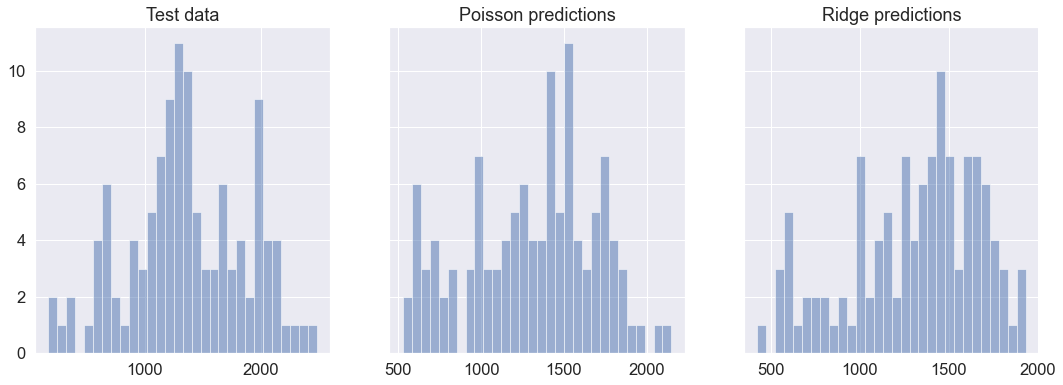

In [111]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
ax1.hist(y_test, bins=30, alpha=0.5)
ax1.set_title("Test data")
ax2.hist(poisson_pred, bins=30, alpha=0.5)
ax2.set_title("Poisson predictions")
ax3.hist(ridge_pred, bins=30, alpha=0.5)
ax3.set_title("Ridge predictions")

## Exercise 1

1. Train a `HistGradientBoostingRegressor` with `random_state=42` on the training set.
1. Compute the predictions on the test set and save it as `hist_pred`.
1. Compute the metrics for the predicitons on the model using `compute_metrics`.
1. Train a `HistGradientBoostingRegressor` with `loss='poisson'` and `random_state=42` on the training set.
1. Compute the predictions from this estimator and save it as `hist_poisson_pred`.
1. Compute the metrics for the predicitons on the model using `compute_metrics`.
1. **Extra:** Plot the prediction distrubutions for the two models and the original data.
    - **Hint** You may copy the code right above this cell.

In [121]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hist = HistGradientBoostingRegressor(random_state=42)

hist.fit(X_train, y_train)

hist_pred = hist.predict(X_test)

compute_metrics(y_test, hist_pred)

{'mse': 176224.70298216515, 'mean poisson deviance': 144.18220509615267}

In [123]:
hist_poisson = HistGradientBoostingRegressor(loss='poisson', random_state=42, verbose=)
hist_poisson.fit(X_train, y_train)

HistGradientBoostingRegressor(loss='poisson', random_state=42)

In [ ]:
hist_poisson_pred = hist_poisson.predict(X_test)
compute_metrics(y_test, hist_poisson_pred)

Text(0.5, 1.0, 'Hist Poisson predictions')

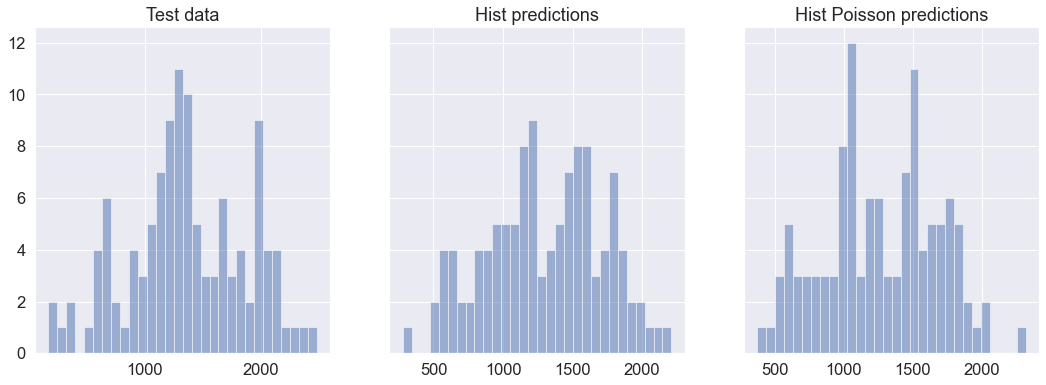

In [114]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
ax1.hist(y_test, bins=30, alpha=0.5)
ax1.set_title("Test data")
ax2.hist(hist_pred, bins=30, alpha=0.5)
ax2.set_title("Hist predictions")
ax3.hist(hist_poisson_pred, bins=30, alpha=0.5)
ax3.set_title("Hist Poisson predictions")

**If you are running locally**, you can uncomment the following cell to load the solution into the cell. On **Google Colab**, [see solution here](https://github.com/thomasjpfan//ml-workshop-advanced/blob/master/notebooks/solutions/03-ex01-solutions.py).

In [ ]:
# %load solutions/03-ex01-solutions.py

### Back to slides!

## Calibration Curve for Regressors

In [115]:
from sklearn.utils import gen_even_slices

def _calibration_curve_weighted(y_true, y_pred, n_bins=10, sample_weight=None):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    
    idx_sort = np.argsort(y_pred)
    y_pred_bin = np.zeros(n_bins)
    y_true_bin = np.zeros(n_bins)
    
    if sample_weight is not None:
        sample_weight = np.asarray(sample_weight)
    
    for i, sl in enumerate(gen_even_slices(len(y_true), n_bins)):
        if sample_weight is None:
            y_pred_bin[i] = np.average(y_pred[idx_sort][sl])
            y_true_bin[i] = np.average(y_true[idx_sort][sl])
        else:
            weights = sample_weight[idx_sort][sl]
            y_pred_bin[i] = np.average(y_pred[idx_sort][sl], weights=weights)
            y_true_bin[i] = np.average(y_true[idx_sort][sl], weights=weights)
    return y_pred_bin, y_true_bin

def plot_calibration_curve_regression(y_true, y_pred, n_bins=10, ax=None, title="", sample_weight=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    y_pred_bin, y_true_bin = _calibration_curve_weighted(y_test, y_pred, sample_weight=sample_weight)
    
    bin_centers = np.arange(1, len(y_pred_bin) + 1)
    ax.plot(bin_centers, y_pred_bin, marker='x', linestyle="--", label="predictions")
    ax.plot(bin_centers, y_true_bin, marker='o', linestyle="--", label="observations")
    ax.set(xlabel="Bin number", xticks=bin_centers, title=title)
    ax.legend()
    return ax

Train a `hist_poisson` to compare calibration curves

In [138]:
from sklearn.ensemble import HistGradientBoostingRegressor

hist_poisson = HistGradientBoostingRegressor(loss='poisson', random_state=42)
hist_poisson.fit(X_train, y_train)

hist_poisson_pred = hist_poisson.predict(X_test)

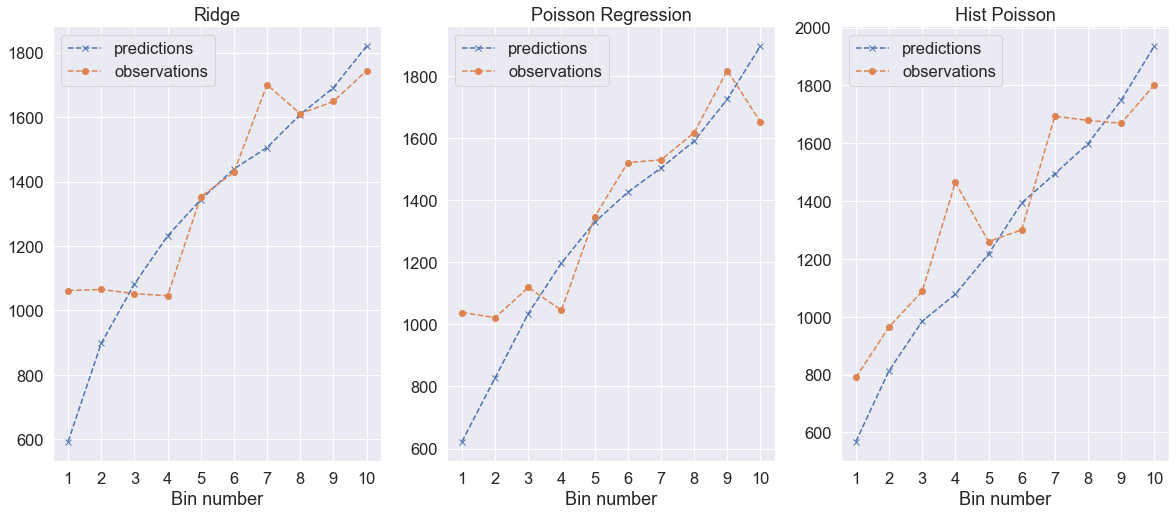

In [139]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
plot_calibration_curve_regression(y_test, ridge_pred, ax=ax1, title="Ridge")
plot_calibration_curve_regression(y_test, poisson_pred, ax=ax2, title="Poisson Regression")
plot_calibration_curve_regression(y_test, hist_poisson_pred, ax=ax3, title="Hist Poisson");

## Claims dataset

In [31]:
claims_path = data_path / "claims.csv"
if IN_COLAB:
    CLAIMS_URL = "https://raw.githubusercontent.com/thomasjpfan/ml-workshop-advanced/master/notebooks/data/claims.csv"
    claims = pd.read_csv(CLAIMS_URL)
else:
    claims = pd.read_csv(claims_path)

- ClaimPerYear: number of claims on the given policy;
- Exposure: total exposure in yearly units;
- Area: area code (categorical, ordinal);
- VehPower: power of the car (categorical, ordinal);
- VehAge: age of the car in years;
- DrivAge: age of the (most common) driver in years;
- BonusMalus: bonus-malus level between 50 and 230 (with reference level 100);
- VehBrand: car brand (categorical, nominal);
- VehGas: diesel or regular fuel car (binary);
- Density: density of inhabitants per km2 in the city of the living place of the driver;
- Region: regions in France (prior to 2016)

In [32]:
claims.head()

,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimsPerYear
0,1.00,D,4.0,11.0,42.0,64.0,B2,Regular,856.0,R24,0.0
1,0.18,E,10.0,12.0,35.0,100.0,B1,Regular,4762.0,R93,0.0
2,0.08,E,6.0,4.0,53.0,50.0,B1,Diesel,3317.0,R93,0.0
3,0.36,A,5.0,2.0,44.0,50.0,B2,Diesel,35.0,R52,0.0
4,0.60,C,4.0,0.0,32.0,85.0,B12,Diesel,200.0,R73,0.0


In [140]:
# temp = all_years_test['Exposure']
temp = all_years_test['temp']

In [141]:
# y = claims["ClaimsPerYear"]
y = all_years_test['value']

In [143]:
# X = all_years_test.drop(["Exposure", "ClaimsPerYear"], axis="columns")
X = all_years_test[['temp', 'humidity', 'wind_speed', 'rain_1h', 'federal_holiday_flag', 'school_holiday_flag', 'MONTH', 'DAY_OF_WEEK', 'DAY']]
X = X.drop(["temp"], axis="columns")

In [ ]:
# X = all_years_test[['temp', 'humidity', 'wind_speed', 'rain_1h', 'federal_holiday_flag', 'school_holiday_flag', 'MONTH', 'DAY_OF_WEEK', 'DAY']]
# y = all_years_test['value']

In [144]:
X.head()

,humidity,wind_speed,rain_1h,federal_holiday_flag,school_holiday_flag,MONTH,DAY_OF_WEEK,DAY
Full_Date,,,,,,,,
2019-05-01,36.666667,6.969583,0.00,0,0,5,2,1
2019-05-02,78.920000,3.918400,4.74,0,0,5,3,2
2019-05-03,81.840000,4.082800,3.97,0,0,5,4,3
2019-05-04,89.545455,2.724242,10.40,0,0,5,5,4
2019-05-05,76.333333,3.331667,0.00,0,0,5,6,5


### Split data

In [145]:
X_train, X_test, y_train, y_test, temp_train, temp_test = train_test_split(
    X, y, temp, random_state=42)

### Train simple dummy regresor

In [146]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor()
dummy.fit(X_train, y_train, sample_weight=temp_train)

DummyRegressor()

In [147]:
dummy_pred = dummy.predict(X_test)
compute_metrics(y_test, dummy_pred, sample_weight=temp_test)

{'mse': 252658.24192475245, 'mean poisson deviance': 199.62553465574032}

In [148]:
dummy_pred[:10]

array([1315.02427609, 1315.02427609, 1315.02427609, 1315.02427609,
       1315.02427609, 1315.02427609, 1315.02427609, 1315.02427609,
       1315.02427609, 1315.02427609])

## Ridge

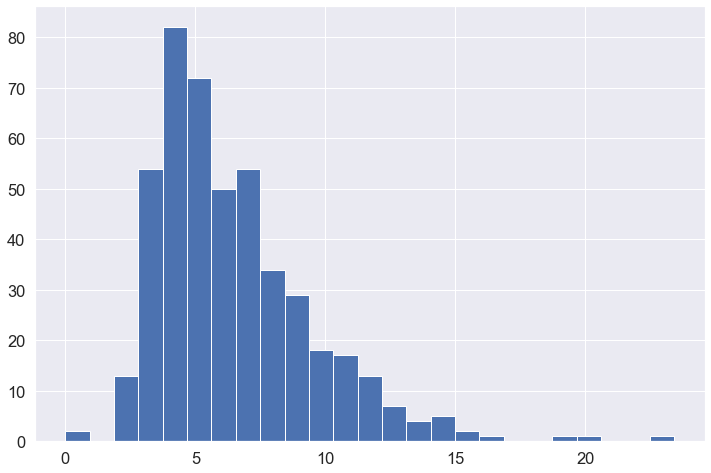

In [150]:
X['wind_speed'].hist(bins=25);

In [172]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

linear_model_preprocessor = ColumnTransformer(
    [
        ("passthrough_numeric", StandardScaler(),
            ['humidity', 'wind_speed']),
        ("binned_numeric", KBinsDiscretizer(n_bins=10),
            ['DAY']),
        ("log_scaled_numeric", FunctionTransformer(np.log1p),
            ['rain_1h']),
        ("onehot_categorical", OneHotEncoder(handle_unknown='error'),
            ['federal_holiday_flag', 'school_holiday_flag', 'MONTH', 'DAY_OF_WEEK']),
    ],
)

In [173]:
linear_model_preprocessor.fit_transform(X_train)

<345x30 sparse matrix of type '<class 'numpy.float64'>'
	with 2576 stored elements in Compressed Sparse Row format>

In [174]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MaxAbsScaler

ridge = Pipeline([
    ("preprocessor", linear_model_preprocessor),
    ("reg", Ridge(alpha=1e-6))])
ridge.fit(X_train, y_train, reg__sample_weight=temp_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('passthrough_numeric',
                                                  StandardScaler(),
                                                  ['humidity', 'wind_speed']),
                                                 ('binned_numeric',
                                                  KBinsDiscretizer(n_bins=10),
                                                  ['DAY']),
                                                 ('log_scaled_numeric',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['rain_1h']),
                                                 ('onehot_categorical',
                                                  OneHotEncoder(),
                                                  ['federal_holiday_flag',
                                                   'school_holiday_flag',
                                                   'MONTH', 'DAY_OF_WEEK'])])),
                ('reg', Ridge(alpha=1e-06))])

In [177]:
ridge_pred = ridge.predict(X_test)
ridge_metrics = compute_metrics(y_test, ridge_pred, sample_weight=temp_test)
ridge_metrics

{'mse': 198887.20062952596, 'mean poisson deviance': 171.6384550153345}

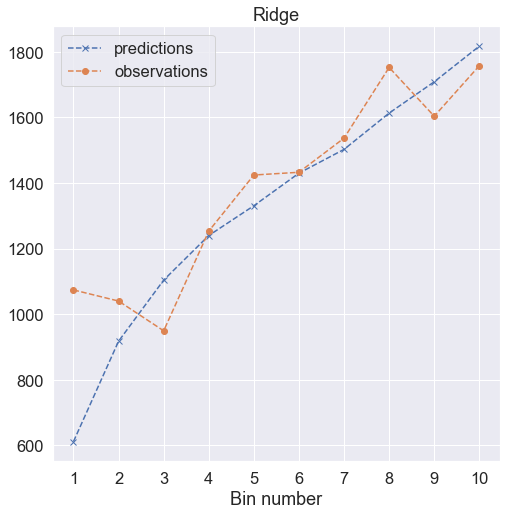

In [178]:
plot_calibration_curve_regression(y_test, ridge_pred, title="Ridge", sample_weight=temp_test);

## Exercise 2

1. Construct a pipeline with `PoissonRegressor(alpha=1e-4)` with the same preprocesser we have above.
    - **Hint**: You may reuse `linear_model_preprocessor` and `MaxAbsScaler`
2. Training the pipeline on the training set. **Hint**: Remember to set the the sample weight!
3. Plot the calibration curve using `plot_calibration_curve_regression`. **Hint**: Remember to include the sample weights!

In [180]:
poisson_reg = Pipeline([
    ("preprocessor", linear_model_preprocessor),
    ("reg", PoissonRegressor(alpha=1e-4)),
])

poisson_reg.fit(X_train, y_train, reg__sample_weight=temp_train)

poisson_pred = poisson_reg.predict(X_test)
compute_metrics(y_test, poisson_pred, sample_weight=temp_test)

{'mse': 201306.7922397827, 'mean poisson deviance': 172.91277435676471}

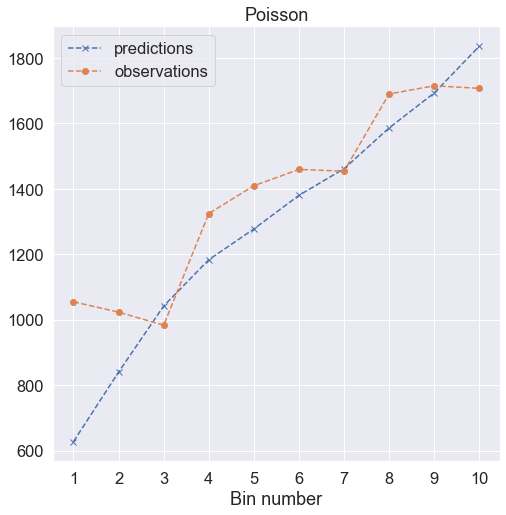

In [181]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_calibration_curve_regression(y_test, poisson_pred, ax=ax, title="Poisson", sample_weight=temp_test);

**If you are running locally**, you can uncomment the following cell to load the solution into the cell. On **Google Colab**, [see solution here](https://github.com/thomasjpfan//ml-workshop-advanced/blob/master/notebooks/solutions/03-ex02-solutions.py).

In [ ]:
# %load solutions/03-ex02-solutions.py

## Exercise 3

1. Build a preprocessor for a tree based model.
    - **Hint**: Use `ColumnTransformer`, encode categories with `OrdinalEncoder` and passthrough the numerical features.
    - **Extra**: You can use `make_column_selector` to select the correct dtypes.
2. Use the preprocessor from step 1 to build a pipeline with `HistGradientBoostingRegressor` with `loss="poisson"`.
3. Fit the model from step 2 while also setting `sample_weight` to `exposure_train`.
4. Use `compute_metrics` to compute the mse and the mean poisson deviance.
    - **Hint** Rememver to incldue the sample weight!
5. Plot the calibration curve using `plot_calibration_curve_regression`.
    - **Hint** remember to include the sample weights!

In [124]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector

In [183]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector

tree_preprocessor = ColumnTransformer([
    ("categorical", 
     OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
         make_column_selector(dtype_include='object')
    ),
    ("numerical", "passthrough", make_column_selector(dtype_include='number'))
])

hist_poisson = Pipeline([
    ("preprocessor", tree_preprocessor),
    ("hist", HistGradientBoostingRegressor(loss="poisson", random_state=42))
])

hist_poisson.fit(X_train, y_train, hist__sample_weight=temp_train)

hist_poisson_pred = hist_poisson.predict(X_test)

compute_metrics(y_test, hist_poisson_pred, sample_weight=temp_test)

{'mse': 202419.492609104, 'mean poisson deviance': 160.85575722408325}

<AxesSubplot:title={'center':'Hist Poisson'}, xlabel='Bin number'>

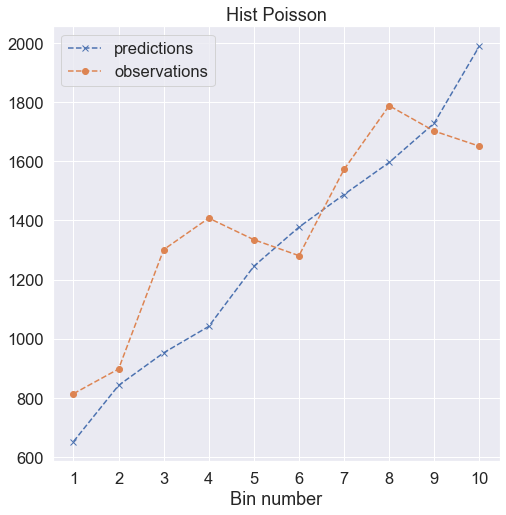

In [184]:
plot_calibration_curve_regression(y_test, hist_poisson_pred, title="Hist Poisson", sample_weight=temp_test)

**If you are running locally**, you can uncomment the following cell to load the solution into the cell. On **Google Colab**, [see solution here](https://github.com/thomasjpfan//ml-workshop-advanced/blob/master/notebooks/solutions/03-ex03-solutions.py).

In [ ]:
# %load solutions/03-ex03-solutions.py